# <b> Employee Network Analysis
![image-caption](https://c.pxhere.com/photos/46/b3/accomplishment_adults_blur_business_business_people_businessmen_businesswomen_depth_of_field-1570731.jpg!d)

## <b><span style='background :#D0D0D0' >Executive Summary</span>
***

<font size="4">
For working in the analytics department of the company, It was required to map out the company's employee network using message data. The plan was to use the network map to understand interdepartmental dynamics better and explore how the company shares information. The ultimate goal of this project is to think of ways to improve collaboration throughout the company. <br><br>
    
    
Throughout analyzing the data, a list of key questions were asked to help better understand the data and get better recommendations.<br>
So through this report, the following topics shall be covered
    
1. Which departments are the most/least active? <br>
2. Which employee has the most connections? <br>
3. Identifying the most influential departments and employees <br>
4. In which departments is it recommended to boost collaboration <br>

<br>
And upon completing the analysis, It was found out that:

1. The most active department is *Sales*, While the least active is *Marketing*<br><br>
2. The employee with the most number of connections is the employee with ID *598* having a total of 81 connections<br><br>
3. The IDs of the most 5 influential employees in a descending order are:  
       &emsp; a. 598  
       &emsp; b. 144  
       &emsp; c. 128  
       &emsp; d. 605  
       &emsp; e. 586 <br>
    And the most influential departments, sorted also in a descending order:  
    &emsp; a. Sales  
    &emsp; b. Operations  
    &emsp; c. Admin  
    &emsp; d. IT  
    &emsp; e. Engineering  
    &emsp; f. Marketing<br><br>
4. Finally, It was recommended to boost collaboration in the *engineering* and *marketing* departments due to the lack of activity there.
<font>

***

## <b><span style='background :#D0D0D0' >Notebook</span>

### <b>Setup the Environment

<font size="3">
    Here we load all the modules used in the notebook.
    These modules are:
    <br> &emsp; - Pandas  (For data manipulation and storage)
    <br> &emsp; - Numpy    (For data manipulation)    
    <br> &emsp; - Seaborn      (For visualizations)
    <br> &emsp; - Matplotlib  (For visualizations)
    <br> &emsp; - NetworkX    (For modeling the network)
    <br> &emsp; - NxViz      (For visualizing the network)
<font>

In [2]:
%%capture
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
import numpy as np
import networkx as nx

try:
    import nxviz
    from nxviz import annotate
except ModuleNotFoundError:
    ! pip install nxviz
    import nxviz
    from nxviz import annotate

### <b>Loading the Data

<font size="3">
    Here we load our data from the csv files into two dataframes
    <br> Then we merge the two frames into a single big one
<font>

In [3]:
#Loading the messages and employees from their csv files
messages = pd.read_csv('data/messages.csv', parse_dates= ['timestamp'])
employees = pd.read_csv('data/employees.csv')

#Creating a dataframe for the senders data
senders = messages[['sender']]
senders = senders.merge(employees, left_on='sender', right_on='id', how='left')
senders = senders.drop(columns=['sender'])
senders.columns = senders.columns.map(lambda x: 'sender_' + str(x))

#Creating a dataframe for the receivers data
receivers = messages[['receiver']]
receivers = receivers.merge(employees, left_on='receiver', right_on='id', how='left')
receivers = receivers.drop(columns=['receiver'])
receivers.columns = receivers.columns.map(lambda x: 'receiver_' + str(x))

#Merging the senders and receivers data
data = messages.drop(columns=['sender','receiver'])
data

Data = pd.concat([senders, receivers, data], axis=1)
Data

,sender_id,sender_department,sender_location,sender_age,receiver_id,receiver_department,receiver_location,receiver_age,timestamp,message_length
0,79,Sales,France,33,48,IT,France,34,2021-06-02 05:41:34,88
1,79,Sales,France,33,63,Sales,France,38,2021-06-02 05:42:15,72
2,79,Sales,France,33,58,Sales,Germany,40,2021-06-02 05:44:24,86
3,79,Sales,France,33,70,Operations,France,47,2021-06-02 05:49:07,26
4,79,Sales,France,33,109,Marketing,Brasil,32,2021-06-02 19:51:47,73
...,...,...,...,...,...,...,...,...,...,...
3507,469,Operations,France,54,1629,Sales,Brasil,35,2021-11-24 05:04:57,75
3508,1487,Sales,France,31,1543,Operations,US,48,2021-11-26 00:39:43,25
3509,144,Sales,US,50,1713,IT,Germany,47,2021-11-28 18:30:47,51
3510,1879,Engineering,US,40,1520,Admin,US,45,2021-11-29 07:27:52,58


### <b>What are the Most/Least Active Departments?

<font size="3">
    Now we start to analyze our data
    <br>In Figure 1, we can observe the total count of messages grouped by each department, sorted in descending order of the total messages
    <br>The sum is split into two sub-categories, messages sent on the left and messages received on the right.
    <br>It is clear that the sales department is the most active, while the marketing department is the least.
<font>

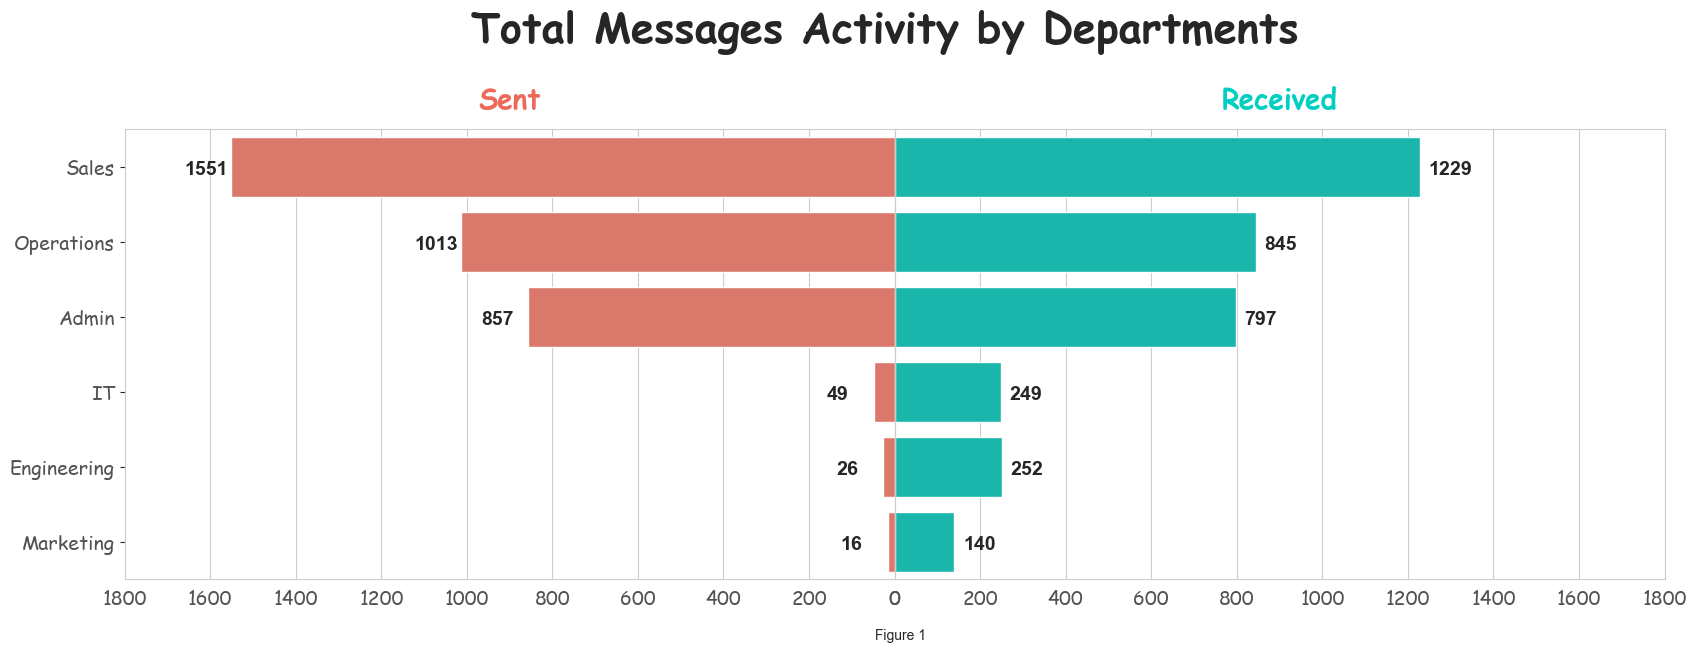

In [4]:
#Counting the total messages sent by each department
active_senders_department = Data.groupby('sender_department').size().to_frame()
active_senders_department.index = active_senders_department.index.rename('Department')
active_senders_department.columns = ["Senders"]

#Counting the total messages received by each department
active_receivers_department = Data.groupby('receiver_department').size().to_frame()
active_receivers_department.index = active_receivers_department.index.rename('Department')
active_receivers_department.columns = ["Receivers"]

#Counting the total messages activity by merging the two dataframes and summing each row
activity = pd.concat([active_senders_department, active_receivers_department], axis=1)
activity['Total'] = activity.sum(axis=1)
activity = activity.sort_values(by='Total', ascending=False)
activity

sns.set_style('whitegrid')

hfont = {'fontfamily':'cursive'}
font_color = '#525252'
color1 = '#ed6a5a' #RED
color2 = '#00CFC1' #TEAL

#Creating 2 charts that are so close almost seen as one big chart
fig, axes = plt.subplots(figsize=(20,6), ncols=2, sharey=True)
fig.tight_layout()
plt.subplots_adjust(wspace=0, top=0.85, bottom=0.1, left=0.18, right=0.95)

#Plotting the data on each chart
sns.barplot(data=activity, x='Senders', y=activity.index.values, ax=axes[0], color=color1).set(xlabel=None)
sns.barplot(data=activity, x='Receivers', y=activity.index.values, ax=axes[1], color=color2).set(xlabel=None)

#Inverting the left chart Axes
axes[0].invert_xaxis() 
axes[0].yaxis.tick_left()

#Setting each chart title
axes[0].set_title("Sent", fontsize=20, pad=15, color=color1, **hfont, weight="bold")
axes[1].set_title("Received", fontsize=20, pad=15, color=color2, **hfont, weight="bold")

#Setting the x-axis tick values
ticks = np.arange(0,1900,200)
axes[0].set_xticks(ticks)
axes[1].set_xticks(ticks)

#Setting the x and y labels colors
for label in (axes[0].get_xticklabels() + axes[0].get_yticklabels()):
    label.set(fontsize=14, color=font_color, **hfont)
for label in (axes[1].get_xticklabels() + axes[1].get_yticklabels()):
    label.set(fontsize=14, color=font_color, **hfont)

#Annotating the bar values
for p in axes[0].patches:
    axes[0].annotate(int(p.get_width()) , (p.get_width()+110, p.get_y()+0.5), fontsize=14, weight="bold")
    
for p in axes[1].patches:
    axes[1].annotate(int(p.get_width()) , (p.get_width()+20, p.get_y()+0.5), fontsize=14, weight="bold")

#Setting the plot title
plt.suptitle("Total Messages Activity by Departments", fontsize=30, weight="bold",x=0.56, y=1.05, **hfont)
plt.figtext(0.568, 0, "Figure 1", ha="center", fontsize=10)
plt.show()

### <b>Which Employee Has the Most Connections?

<font size="3">
    The next step is to find the employee with the most number of connections.
    <br>We found that the employee with ID 598 (marked in teal blue) got the title with a total of 81 connections.
    <br>In figure 2 below, we displayed the top 5 employees with most connections in the form of circles.
    <br>Each circle contains the employee ID and the number of connections beneath.
    <br>And the more connections an employee has, the bigger the circle.
<font>

In [5]:
#A packed bubble chart from matplotlib
class BubbleChart:
    def __init__(self, area, bubble_spacing=0):
        """
        Setup for bubble collapse.

        Parameters
        ----------
        area : array-like
            Area of the bubbles.
        bubble_spacing : float, default: 0
            Minimal spacing between bubbles after collapsing.

        Notes
        -----
        If "area" is sorted, the results might look weird.
        """
        area = np.asarray(area)
        r = np.sqrt(area / np.pi)

        self.bubble_spacing = bubble_spacing
        self.bubbles = np.ones((len(area), 4))
        self.bubbles[:, 2] = r
        self.bubbles[:, 3] = area
        self.maxstep = 2 * self.bubbles[:, 2].max() + self.bubble_spacing
        self.step_dist = self.maxstep / 2

        # calculate initial grid layout for bubbles
        length = np.ceil(np.sqrt(len(self.bubbles)))
        grid = np.arange(length) * self.maxstep
        gx, gy = np.meshgrid(grid, grid)
        self.bubbles[:, 0] = gx.flatten()[:len(self.bubbles)]
        self.bubbles[:, 1] = gy.flatten()[:len(self.bubbles)]

        self.com = self.center_of_mass()

    def center_of_mass(self):
        return np.average(
            self.bubbles[:, :2], axis=0, weights=self.bubbles[:, 3]
        )

    def center_distance(self, bubble, bubbles):
        return np.hypot(bubble[0] - bubbles[:, 0],
                        bubble[1] - bubbles[:, 1])

    def outline_distance(self, bubble, bubbles):
        center_distance = self.center_distance(bubble, bubbles)
        return center_distance - bubble[2] - \
            bubbles[:, 2] - self.bubble_spacing

    def check_collisions(self, bubble, bubbles):
        distance = self.outline_distance(bubble, bubbles)
        return len(distance[distance < 0])

    def collides_with(self, bubble, bubbles):
        distance = self.outline_distance(bubble, bubbles)
        idx_min = np.argmin(distance)
        return idx_min if type(idx_min) == np.ndarray else [idx_min]

    def collapse(self, n_iterations=50):
        """
        Move bubbles to the center of mass.

        Parameters
        ----------
        n_iterations : int, default: 50
            Number of moves to perform.
        """
        for _i in range(n_iterations):
            moves = 0
            for i in range(len(self.bubbles)):
                rest_bub = np.delete(self.bubbles, i, 0)
                # try to move directly towards the center of mass
                # direction vector from bubble to the center of mass
                dir_vec = self.com - self.bubbles[i, :2]

                # shorten direction vector to have length of 1
                dir_vec = dir_vec / np.sqrt(dir_vec.dot(dir_vec))

                # calculate new bubble position
                new_point = self.bubbles[i, :2] + dir_vec * self.step_dist
                new_bubble = np.append(new_point, self.bubbles[i, 2:4])

                # check whether new bubble collides with other bubbles
                if not self.check_collisions(new_bubble, rest_bub):
                    self.bubbles[i, :] = new_bubble
                    self.com = self.center_of_mass()
                    moves += 1
                else:
                    # try to move around a bubble that you collide with
                    # find colliding bubble
                    for colliding in self.collides_with(new_bubble, rest_bub):
                        # calculate direction vector
                        dir_vec = rest_bub[colliding, :2] - self.bubbles[i, :2]
                        dir_vec = dir_vec / np.sqrt(dir_vec.dot(dir_vec))
                        # calculate orthogonal vector
                        orth = np.array([dir_vec[1], -dir_vec[0]])
                        # test which direction to go
                        new_point1 = (self.bubbles[i, :2] + orth *
                                      self.step_dist)
                        new_point2 = (self.bubbles[i, :2] - orth *
                                      self.step_dist)
                        dist1 = self.center_distance(
                            self.com, np.array([new_point1]))
                        dist2 = self.center_distance(
                            self.com, np.array([new_point2]))
                        new_point = new_point1 if dist1 < dist2 else new_point2
                        new_bubble = np.append(new_point, self.bubbles[i, 2:4])
                        if not self.check_collisions(new_bubble, rest_bub):
                            self.bubbles[i, :] = new_bubble
                            self.com = self.center_of_mass()

            if moves / len(self.bubbles) < 0.1:
                self.step_dist = self.step_dist / 2

    def plot(self, ax, labels, colors):
        """
        Draw the bubble plot.

        Parameters
        ----------
        ax : matplotlib.axes.Axes
        labels : list
            Labels of the bubbles.
        colors : list
            Colors of the bubbles.
        """
        for i in range(len(self.bubbles)):
            circ = plt.Circle(
                self.bubbles[i, :2], self.bubbles[i, 2], color=colors[i])
            ax.add_patch(circ)
            ax.text(*self.bubbles[i, :2], labels[i],
                    horizontalalignment='center', verticalalignment='center', fontsize=10, weight="bold")

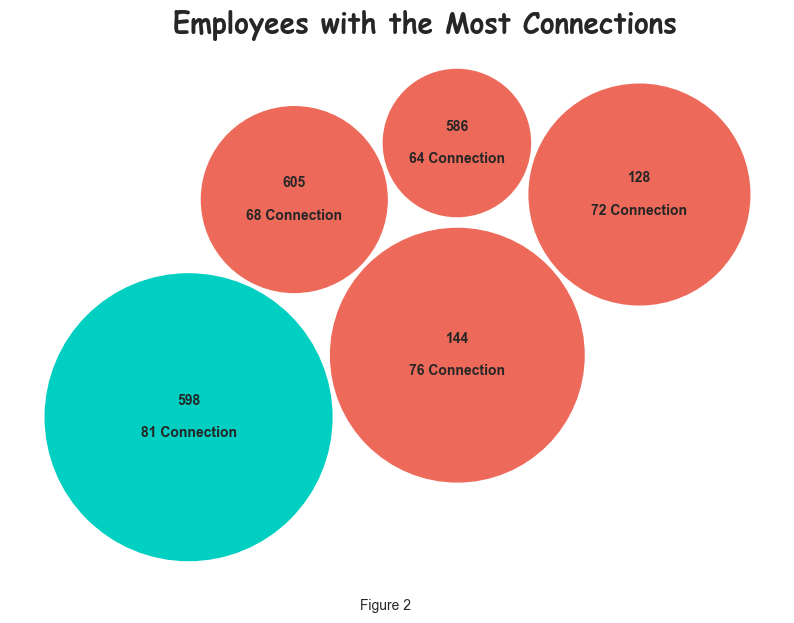

In [6]:
#Creating a list of all employees in the network
df1 = Data[['receiver_id']]
df1.columns = ['id']
df2 = Data[['sender_id']]
df2.columns = ['id']
nodes = pd.concat([df1,df2]).drop_duplicates().id.tolist()

#Creating a dataframe of messages sent
Connection = Data[['sender_id','receiver_id']]
edges = Connection.drop_duplicates().values.tolist()

#Creating a network using Networkx livrary and adding all the edges
network = nx.MultiGraph() #Graph() #DiGraph()
network.add_edges_from(edges)


#Calculating the number of connections for each node(employee)
neighbors = pd.DataFrame(columns=['ID', 'Number of Connections'])
new_row = dict()

for node in nodes:
    new_row = {'ID': node, 'Number of Connections': len(list(network.neighbors(node)))}
    neighbors = neighbors.append(new_row, ignore_index=True)

#Taking the top most employees
Connections = neighbors.sort_values(by='Number of Connections', ascending=False, ignore_index=True).set_index('ID')[:5]
Connections

#Creating a bubble chart
bubble_chart = BubbleChart(area=(Connections["Number of Connections"]*np.arange(Connections.size+1,1,-1)).tolist(), bubble_spacing=0.5)
bubble_chart.collapse()

fig, ax = plt.subplots(figsize=(10,10),subplot_kw=dict(aspect="equal"))
bubble_chart.plot(ax, 
                  (Connections.index.astype(str) + '\n\n' + Connections['Number of Connections'].astype(str) + ' Connection').tolist(), 
                  #sns.color_palette(palette='Set3', n_colors=Connections.size),
                  [color2] + [color1]*(Connections.size-1)
                 )

ax.axis("off")
ax.relim()
ax.autoscale_view()
plt.suptitle('Employees with the Most Connections', fontsize=20, weight="bold", **hfont, x=0.54, y=0.8)
plt.figtext(0.5, 0.2, "Figure 2", ha="center", fontsize=10)
plt.show()

### <b> Which Employee is the Most Influential?

<font size="3">
    Using NetworkX analysis, we calculate each employee's Degree Centrality score.
    <br>And it was found out that employee with ID 598 had the highest score.
    <br>In figure 3 below, we plot the most influential employee at the center and all of his influenced connections circled around.
    
<font>

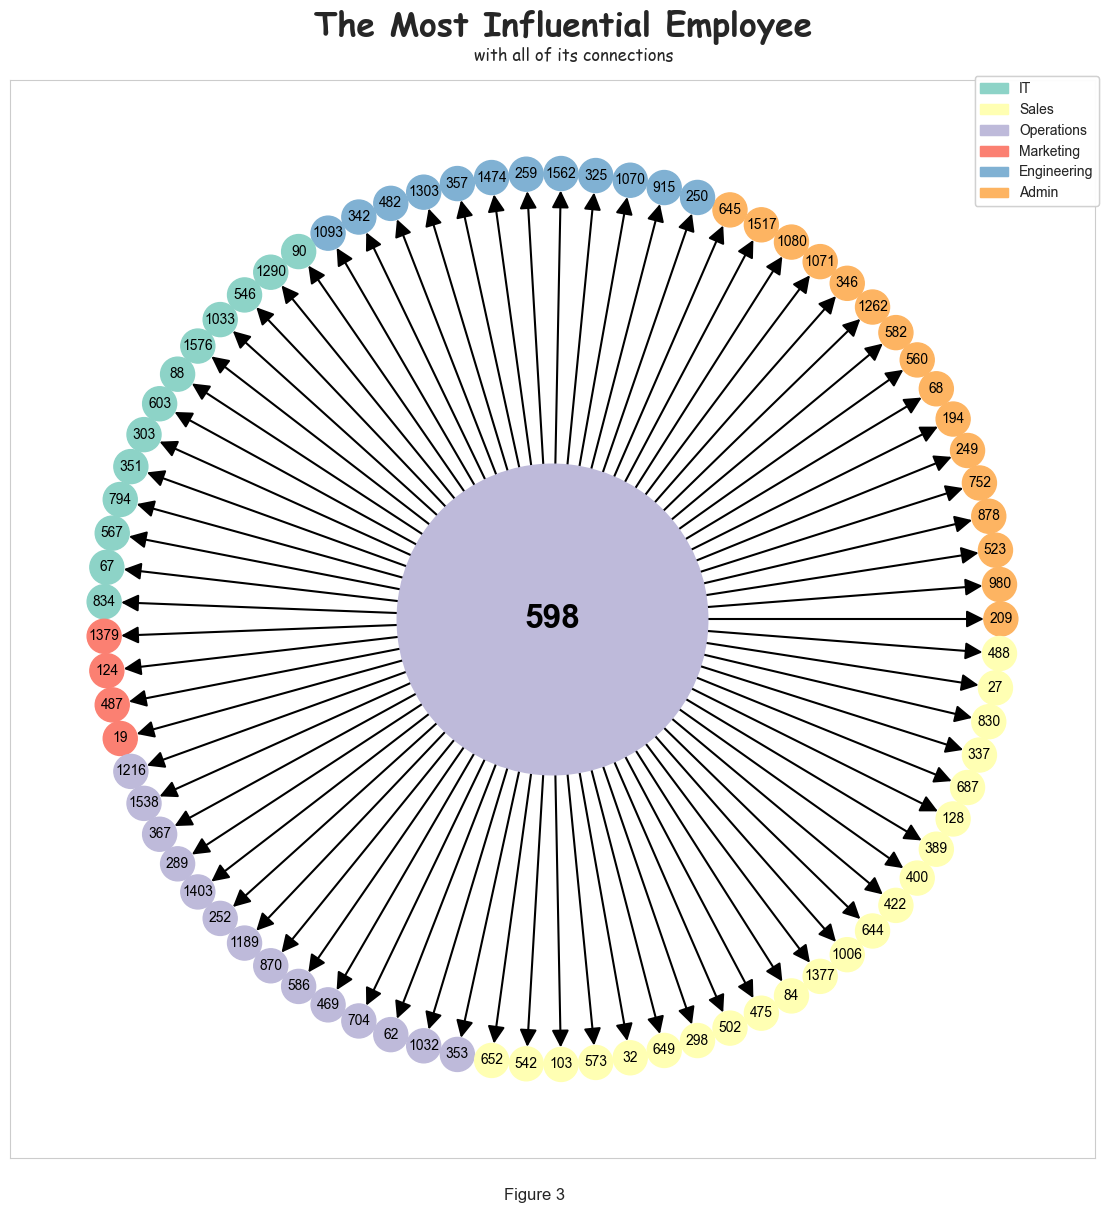

And the top 10 most influential employees are:
Please note that these Degree Centrality scores are relative values rather than the absolute ones


,Degree Score
ID,
598,100.00
144,92.77
128,89.16
605,84.34
586,77.11
389,73.49
317,65.06
509,65.06
337,49.40


In [13]:
#Creating a dataframe carrying only the department for each emplyee
df1 = Data[['receiver_id','receiver_department']]
df1.columns = ['ID','Department']
df2 = Data[['sender_id','sender_department']]
df2.columns = ['ID','Department']
Users_Departments = pd.concat([df1,df2]).drop_duplicates().set_index('ID')
Users_Departments

#Calculating the Degree Centrality for each emplyee
degN = nx.degree_centrality(network)
deg = pd.DataFrame(list(degN.items()))
deg.columns = ['ID','Degree Score']
deg = deg.set_index('ID')
deg = deg.sort_values(by='Degree Score', ascending= False)
deg = round((deg-deg.min())/(deg.max()-deg.min())*100,2)
deg

#Calculating the Betweenness Centrality for each emplyee
betN = nx.betweenness_centrality(network)
bet = pd.DataFrame(list(betN.items()))
bet.columns = ['ID','Betweenness Score']
bet = bet.set_index('ID')
bet = bet.sort_values(by='Betweenness Score', ascending= False)
bet = round((bet-bet.min())/(bet.max()-bet.min())*100,2)
bet

#Merging both centralities for each emplyee and taking their average value
ID_Scores = pd.merge(deg, bet, left_index=True, right_index=True)
ID_Scores['Total Score'] = (ID_Scores['Degree Score'] + ID_Scores['Betweenness Score'])/2
ID_Scores = ID_Scores.sort_values(by='Total Score', ascending= False)

ID_Scores = deg  # Here we only care about the Degree Centrality so I skipped the Betweeness scores
ID_Scores

#Getting the highest score node
center_node = ID_Scores.index[0]

#Creating a nx Di graph
most_influential = nx.DiGraph()

#Adding edges to the network
most_influential.add_edges_from(network.edges(center_node))

for node in list(network.nodes):
    if most_influential.has_node(node):
        most_influential.nodes[node]['Department'] = Users_Departments[Users_Departments.index == node].iloc[0,0]
        
#Creating a df from the network then sorting the nodes by department
df = pd.DataFrame(columns=['Node', 'Department'])
for node in list(most_influential.nodes):
    df = df.append( {'Node': node, 'Department':most_influential.nodes[node]['Department']}, ignore_index=True)

df = df.sort_values(by='Department')

#Clearning the network
most_influential.clear()

#Re adding the sorted nodes to the network
most_influential.add_nodes_from(df.set_index('Node').T.to_dict())
for node in list(network.nodes):
    if most_influential.has_node(node):
        most_influential.nodes[node]['Department'] = Users_Departments[Users_Departments.index == node].iloc[0,0]

#Re adding the edges
most_influential.add_edges_from(network.edges(center_node))

#Setting the positions of nodes where all nodes are on circular layout and the most influential is centered between
edge_nodes = set(most_influential) - {center_node}
pos = nx.circular_layout(most_influential.subgraph(edge_nodes))
pos[center_node] = np.array([0, 0])  # manually specify node position


#Creating a color dict containing a color for each department
colorslist = sns.color_palette(palette='Set3', n_colors = Users_Departments.Department.nunique()).as_hex()
colorslist
ColorDict = dict(zip(Users_Departments['Department'].unique(),colorslist))

nx.set_edge_attributes(network, '', name="Department")

#Adding color of each node based on department
for node in list(network.nodes):
    network.nodes[node]['Department'] = Users_Departments[Users_Departments.index == node].iloc[0,0]

#Adding color of each node based on sender department
for u,v,a in network.edges(data=True):
    network.edges[u,v,0]['Department'] = network.nodes[u]['Department']

Colors = []
c=0
for node in list(most_influential.nodes):
    Colors.append(ColorDict[network.nodes[node]['Department']])
    c+=1

fig, ax = plt.subplots(figsize=(14,14))#,subplot_kw=dict(aspect="equal"))

#Drawing the center node
nx.draw_networkx_nodes(most_influential, pos=pos, nodelist=[center_node],
                       node_color=ColorDict[most_influential.nodes[center_node]['Department']], node_size=50000, ax=ax)
#Drawing the other nodes
nx.draw_networkx_nodes(most_influential, pos=pos, node_color= Colors, node_size=600, ax=ax)

#Drawing the edges
nx.draw_networkx_edges(most_influential, pos=pos, ax=ax, arrowsize=26, width=1.5, node_size=600, )

#Creating a dict of the other nodes
influenced = {int(key): str(key) for (key, value) in pos.items() if int(key) != center_node}

#Labeling the center node
nx.draw_networkx_labels(most_influential, pos=pos, ax=ax, font_size=24, labels = {598:'598'}, font_weight='bold')

#Labeling the other nodes
nx.draw_networkx_labels(most_influential, pos=pos, ax=ax, font_size=10, labels=influenced)


Dict = {'bbox_to_anchor': (1.01, 1.01)}

#Creating the legend according to the colors
patchlist = []
for label, color in ColorDict.items():
    data_key = Patch(color=color, label=label)
    patchlist.append(data_key)
    
legend = plt.legend(handles=patchlist, **Dict)
ax.add_artist(legend)
ax.grid(False)

plt.suptitle("The Most Influential Employee", fontsize=24, weight="bold", x=0.52, y=0.93, **hfont)
plt.title("with all of its connections", fontsize=12, x=0.52, y=1.01, **hfont)
plt.figtext(0.5, 0.08, "Figure 3", ha="center", fontsize=12)
plt.show()

print("And the top 10 most influential employees are:")
print("Please note that these Degree Centrality scores are relative values rather than the absolute ones")
display(ID_Scores[:10])

### <b>Which Department is the Most Influential?

<font size="3">
    Now we need to find the most influential department
    <br>To do so, we grouped the degree centrality scores by department and calculated the mean of each group
    <br>And as seen in Figure 4 below, It is clear the the sales department was the most influential while the marketing was the least.
    
<font>

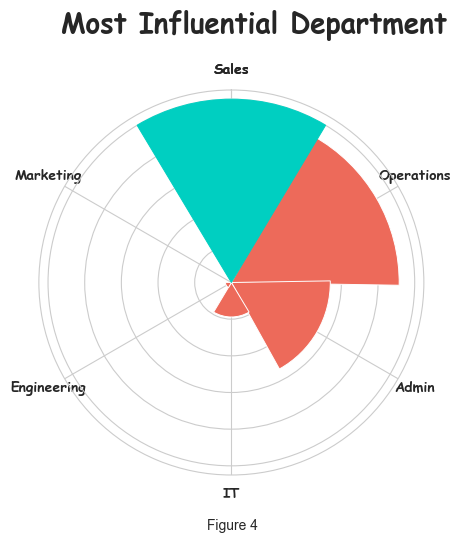

In [8]:
#Creating a dataframe carrying the score of each department
ID_Scores_Departments = pd.merge(ID_Scores, Users_Departments, left_index=True, right_index=True, how='left').groupby('Department').mean()
ID_Scores_Departments = round((ID_Scores_Departments-ID_Scores_Departments.min())/(ID_Scores_Departments.max()-ID_Scores_Departments.min())*100,2)
ID_Scores_Departments = ID_Scores_Departments.sort_values(by='Degree Score', ascending=False)
ID_Scores_Departments

#Creating a circular bar plot
angles = np.linspace(0, 2*np.pi, 6, endpoint=False)
angles = np.concatenate((angles,[angles[0]]))

radar_df = ID_Scores_Departments.append(ID_Scores_Departments.iloc[0])

fig, ax = plt.subplots(figsize = (6,5), subplot_kw={'projection': 'polar', 'aspect':'equal'})

ax.bar(angles, list(radar_df['Degree Score']), color=color1, width=1.08, linewidth=0.7)[-1].set_color(color2)

ax.set_thetagrids(angles * 180/np.pi, list(radar_df.index), size=10, **hfont, weight="bold")

ax.set_yticklabels([])
ax.set_theta_zero_location('N')
ax.set_theta_direction(-1)
plt.suptitle("Most Influential Department", fontsize=20, weight="bold" , x=0.55, y=1.04, **hfont)
plt.figtext(0.514, 0, "Figure 4", ha="center", fontsize=10)
plt.show()

### <b>Conclusion

<font size="3">
    To sum up, Figure 5 below shows each message sent as a black line connecting two nodes, and each node represents an employee.
    <br> we can observe that the Operations and Sales departments had a lot of activity recently while the Engineering and Marketing had much less.
    <br><br>Thus it is recommended to boost collaboration among the Engineering and Marketing departments
<font>

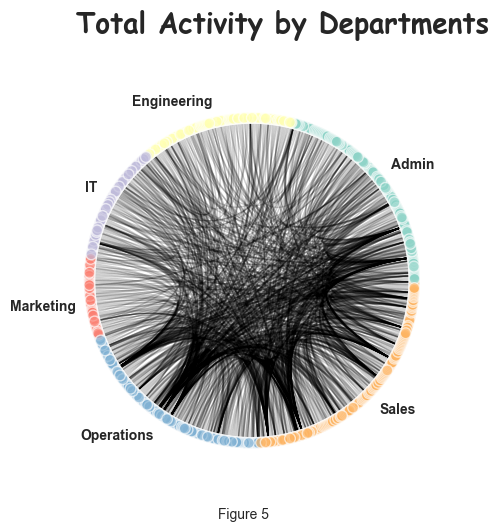

In [9]:
#plt.style.use('seaborn-whitegrid')

#Creating a circos plot
c = nxviz.CircosPlot(network,
                     node_grouping='Department',
                     node_color='Department',
                     nodeprops={'size_scale':7, 'alpha_scale':0.65},
                     #edge_color='Department'
                    )
#Adding the department annotations on the plot
annotate.circos_group(network, group_by='Department', radius=230, fontdict={'weight':'bold'})

#Adding the title
plt.suptitle("Total Activity by Departments", fontsize=20, weight="bold",x=0.56, y=1.06, **hfont)
plt.figtext(0.5, 0, "Figure 5", ha="center", fontsize=10)
plt.show()

***